# Trying_21_stuff_in_SICILIAN_via_MYBinder TO BECOME Demo_SICILIAN_via_MyBinder_with_human_Chr_21

If you didn't start your Jupyter session [here](https://github.com/fomightez/SICILIAN-binder), go there and use '`launch binder`' badge to get started.

Here, in the demonstration Human chromosome 21 will serve as the input 'genome'. Chr 21 is the smallest human chromosome according to the telomere-to-telomere data, see [here](https://ncbi.nlm.nih.gov/datasets/genome/GCF_009914755.1 ). 

We are only using a fraction of the human genome and small human scRNA-seq (Smart-seq2) dataset here for this demonstration in the interest of time, to help keep the demonstration interactive, and **because the computational resources offered by MyBinder are limited**. (Specifics on the human Smart-seq2 data: [GEO Sample GSM4678248](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4678248) -- TF-driven_differentiated_hiPSC 01_A01, which is one of 95 fastq files provided in [GEO series GSE154759](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE154759) corresponding to each individual sorted cell; with the reads accessible in [Run SRR12269911](https://trace.ncbi.nlm.nih.gov/Traces/?view=run_browser&acc=SRR12269911&display=metadata) of [entry accesion SRX8774970](https://www.ncbi.nlm.nih.gov/sra?term=SRX8774970) at the Short Read Archive;ref. [Ng et al., 2021](https://pubmed.ncbi.nlm.nih.gov/33257861/).) While limited, having an environment offering a working pipeline can be helpful to have handy when learning about the pipeline and trying to work out how to use the SICILIAN pipeline in places with more power.

We'll need to index human chromsome 21 with STAR aligner so SICILIAN can use that. Additional input files and the reads from one run of an scRNA-seq analysis are already present in the session provided upon launch.

Overview of this notebook:

1. Install STAR aligner and verify it works to make a mock read sequence to a mock, tiny genome.
1. Index human chromosome 21 with STAR aligner.
1. Make supporting annotator files.
1. Configure the main script of SICILIAN, `SICILIAN.py` to use the generated index, generated supportingfiles, and the provided set of reads from a Smart-seq2 scRNA-seq analysis.
1. Edit `SICILIAN.py` to not use SLURM.
1. For now use the `light_utils.py` provided by the authors (this is an atypical step that you won't hopefully need soon)
1. Run the SICILIAN pipeline

### Preparation STEP #1: Install STAR aligner, which is a dependency of SICILIAN

Install the STAR Aligner to prepare for using SICILIAN.

##### Technical note on environment set up for SICILIAN use  
STAR Aligner could have been specified to be installed already in MyBinder-provided sessions that I assume you are using while reading this. I chose not to do that though as setting up the environment for SICILIAN is quite a challenge as it involves Python, R, and other softwware, packages and libraries in support and I wanted to have at least one representative dependency that still needed to be installed as a representative of that. The `environment.yml` [here](https://github.com/fomightez/SICILIAN-binder/blob/master/binder/environment.yml) should give you a sense of this complexity.       
After installing STAR aligner, we'll establish it works by very quickly mapping a single mock sequence read to a tiny mock genome.
That will set us up for further preparation steps and for ultimately running the SICILIAN pipeline.

##### Installing STAR aligner here

STAR aligner will be installed here with the following command run in a cell:

```shell
%conda install -y bioconda::star
```

If you were doing this in a terminal, you'd leave off the magic `%` symbol. That magic `%` symbol combined with the typical install command, makes a special magic install command in the context of Jupyter that makes sure the installation occurs where the kernel backing this active notebook is running, making managing environments more convenient.

To actually handle the installation of STAR aligner and verify it is working by mapping a read to a mock genome, we can run the Jupyter notebook file `STAR_aligner_run_on_MyBinder.ipynb` with the command `%run STAR_aligner_run_on_MyBinder.ipynb` shown in the cell below. I have added printing the steps to stderr (the pink highlighted lines) to better enable understanding the context of the steps without needing to actually open the notebook `STAR_aligner_run_on_MyBinder.ipynb`:

In [1]:
%run STAR_aligner_run_on_MyBinder.ipynb

Install STAR aligner to prepare
Install is done via the command `%conda install -y bioconda::star`


Channels:
 - conda-forge
 - bioconda
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.5.0
    latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - bioconda::star


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    htslib-1.21                |       h5efdd21_0         3.0 MB  bioconda
    star-2.7.11b               |       h43eeafb_2         8.1 MB  bioconda
    ------------------------------------------------------------
                                           Total:        11.1 MB

The following NEW packages will be INSTALLED:

  htslib             bioconda/linux-64::htslib-1.21-h5efdd21_0 
  star               bioconda/linux-64::star-2.7.11b-h43eeafb_2 



star-

Run a test alignment to demonstrate it works
1. Create a small FASTA file with a short sequence:


>test_seq
ACGTGGACGTACCCGTACGTACCCAAGTACGAGTACGTACGGGTACGTTCCACAAGTACGT


2. Run `mkdir test_index` to make the directory to store the index.

drwxr-xr-x 2 jovyan jovyan 4.0K Sep 27 19:21 test_index/


3. Generate a genome index using this small FASTA file:


	/srv/conda/envs/notebook/bin/STAR-avx2 --runMode genomeGenerate --genomeFastaFiles test.fa --genomeDir test_index --genomeSAindexNbases 1
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Sep 27 19:21:47 ..... started STAR run
Sep 27 19:21:47 ... starting to generate Genome files
Sep 27 19:21:47 ... starting to sort Suffix Array. This may take a long time...
Sep 27 19:21:47 ... sorting Suffix Array chunks and saving them to disk...
Sep 27 19:21:47 ... loading chunks from disk, packing SA...
Sep 27 19:21:47 ... finished generating suffix array
Sep 27 19:21:47 ... generating Suffix Array index
Sep 27 19:21:47 ... completed Suffix Array index
Sep 27 19:21:47 ... writing Genome to disk ...
Sep 27 19:21:47 ... writing Suffix Array to disk ...
Sep 27 19:21:47 ... writing SAindex to disk
Sep 27 19:21:47 ..... finished successfully
	/srv/conda/envs/notebook/bin/STAR-avx2 --runMode alignReads --genomeDir test_index --readFilesIn te

4. Create a small FASTQ file with a few reads from the test sequence:
5. Run the alignment using the small test files:
SHOW THE FILES GENERATED BY ALL THAT AND THE ALIGNING STEP.


total 536K
drwxr-x--- 1 jovyan jovyan 4.0K Sep 27 19:21 ./
drwxr-xr-x 1 root   root   4.0K Sep 26 20:29 ../
-rw-r--r-- 1 jovyan jovyan  220 Jan  6  2022 .bash_logout
-rw-r--r-- 1 jovyan jovyan 3.7K Jan  6  2022 .bashrc
drwxr-xr-x 3 jovyan jovyan 4.0K Sep 26 20:26 benchmarking/
drwxr-xr-x 1 jovyan jovyan 4.0K Sep 26 20:26 binder/
drwxr-xr-x 4 jovyan jovyan 4.0K Sep 26 20:27 .cache/
drwxrwsr-x 1 jovyan jovyan 4.0K Sep 26 20:27 .conda/
drwxr-xr-x 2 jovyan jovyan 4.0K Sep 26 20:26 demo_input/
-rw-r--r-- 1 jovyan jovyan 131K Sep 27 19:20 Demo_SICILIAN_via_MyBinder_with_human_Chr_21.ipynb
drwxr-xr-x 8 jovyan jovyan 4.0K Sep 26 20:26 .git/
-rw-r--r-- 1 jovyan jovyan   22 Sep 26 20:26 .gitignore
drwxr-xr-x 2 jovyan jovyan 4.0K Sep 27 19:20 .ipynb_checkpoints/
drwxr-xr-x 1 jovyan jovyan 4.0K Sep 27 19:20 .ipython/
drwxr-xr-x 3 jovyan jovyan 4.0K Sep 27 19:12 .jupyter/
-rw-r--r-- 1 jovyan jovyan 6.9K Sep 27 19:20 .jupyter-server-log.txt
-rw-r--r-- 1 jovyan jovyan  18K Sep 26 20:26 LICENSE
drwxr-

Examine results to see it worked
Results in 'test_outputLog.final.out'


                                 Started job on |	Sep 27 19:21:47
                             Started mapping on |	Sep 27 19:21:47
                                    Finished on |	Sep 27 19:21:48
       Mapping speed, Million of reads per hour |	0.00

                          Number of input reads |	1
                      Average input read length |	19
                                    UNIQUE READS:
                   Uniquely mapped reads number |	1
                        Uniquely mapped reads % |	100.00%
                          Average mapped length |	19.00
                       Number of splices: Total |	0
            Number of splices: Annotated (sjdb) |	0
                       Number of splices: GT/AG |	0
                       Number of splices: GC/AG |	0
                       Number of splices: AT/AC |	0
               Number of splices: Non-canonical |	0
                      Mismatch rate per base, % |	0.00%
                         Deletion rate per base |	0.00%
 

Results in 'test_outputAligned.out.sam'

@HD	VN:1.4
@SQ	SN:test_seq	LN:61
@PG	ID:STAR	PN:STAR	VN:2.7.11b	CL:/srv/conda/envs/notebook/bin/STAR-avx2   --runMode alignReads      --genomeDir test_index   --readFilesIn test.fq      --outFileNamePrefix test_output
@CO	user command line: /srv/conda/envs/notebook/bin/STAR-avx2 --runMode alignReads --genomeDir test_index --readFilesIn test.fq --outFileNamePrefix test_output
read1	0	test_seq	19	255	19M	*	0	0	GTACCCAAGTACGAGTACG	AAAAAAAAAAAAAAAAAAA	NH:i:1	HI:i:1	AS:i:18	nM:i:0


### Preparation STEP #2: Index human chromosome 21

Now that we know that the STAR aligner software is installed and works, we'll index human chromsome 21 with STAR aligner so that the SICILAN pipeline can use that generated indexing in the process of mapping reads to human chromsome 21 later. Recall, human chromosome 21 is serving as our 'genome' in this limited computational environment. The small size also helps have the demonstration run in a reasonable amount of time for it to be interactive, which wouldn't be expected to the case for a true run of the SICILIAN pipeline, or at least some steps.    
The `star_ref_path` will later be set in the configuration settings to point at the generated indexing results.

We can run the following command to generate that index here:

In [2]:
%%bash
STAR --runMode genomeGenerate \
     --genomeFastaFiles "./demo_input/human_chromosome_21_hg38.fasta" \
     --genomeDir human21_index \
     --genomeSAindexNbases 11

	/srv/conda/envs/notebook/bin/STAR-avx2 --runMode genomeGenerate --genomeFastaFiles ./demo_input/human_chromosome_21_hg38.fasta --genomeDir human21_index --genomeSAindexNbases 11
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Sep 27 19:21:50 ..... started STAR run
Sep 27 19:21:50 ... starting to generate Genome files
Sep 27 19:21:51 ... starting to sort Suffix Array. This may take a long time...
Sep 27 19:21:51 ... sorting Suffix Array chunks and saving them to disk...
Sep 27 19:23:14 ... loading chunks from disk, packing SA...
Sep 27 19:23:16 ... finished generating suffix array
Sep 27 19:23:16 ... generating Suffix Array index
Sep 27 19:23:21 ... completed Suffix Array index
Sep 27 19:23:21 ... writing Genome to disk ...
Sep 27 19:23:21 ... writing Suffix Array to disk ...
Sep 27 19:23:22 ... writing SAindex to disk
Sep 27 19:23:22 ..... finished successfully


`genomeSAindexNbases` was set here based on STAR aligner recommending that for this input chromosome. You'll need to adjust that value based on your genome, see more details including a general forumula [here](https://github.com/alexdobin/STAR/issues/972). 

### Preparation STEP #3: Use SICILIAN's `create_annotator.py` script to prepare the supporting annotator files

Although the SICILIAN algorithm is agnostic to the annotation, in order to indicate how the junctions detected relate the to expected junctions, the SICILIAN pipeline uses supporting files with the details of genes and exons in relation to expected splicing.  
SICILIAN's create_annotator.py script uses Python's pickling to store annotations in pickle files. (For context, pickling is a convenient way to save Python objects in a reusable format.)

Normally, as part of preparing to run SICILIAN's main script, you'd probably use SICILIAN's `create_annotator.py` script to generate these supporting annotator files. Depending on what you are using though you may not have to generate them yourself. Fortunately, that the SICILIAN authors provide pre-computed, ready-to-use supporting index and annotator files for SICILIAN for a handful of species, see the links listed in the [SICILIAN GitHub repo README under 'Download ready-to-use index and annotator files'](https://github.com/salzman-lab/SICILIAN?tab=readme-ov-file#download-ready-to-use-index-and-annotator-files).  


The supporting annotator files need to be made only once by the `create_annotator.py` script in the SICILIAN scripts directory.  

The input for  SICILIAN's `create_annotator.py` script is the annotation file for your genome.  
The GTF-fromatted annotation file for Chromosome 21 was made by filtering the file `grch38_known_genes.gtf` for only the lines that pertain to Chromosome 21 using `awk`. (`grch38_known_genes.gtf` can be found in `SICILIAN_human_hg38_Refs/gtf_file` among the human hg38 files provided by the SICILIAN authors [here](https://github.com/salzman-lab/SICILIAN?tab=readme-ov-file#download-ready-to-use-index-and-annotator-files).)  The resuling file is provided in the `demo_input` directory here to be used as input..

For this demo, we'll run the following command to use SICILIAN's `create_annotator.py` script with human Chromosome 21. 

With the GTF in hand, now the create_annotator.py script can be run to make the annotator pickle files.

In [3]:
%run scripts/create_annotator.py -g demo_input/grch38_chr21_known_genes.gtf  -a annotated_21

dumped exon boundary annotator to /home/jovyan/annotated_21_exon_bounds.pkl
dumped splice junctions annotator to /home/jovyan/annotated_21_splices.pkl
chr21
dumped annotator to /home/jovyan/annotated_21.pkl


Note, that in case of issues, as backup the supporting annotator files that should be obtained by running `create_annotator.py` with Chromosome 21 have been provided and can be found in the `demo_input` directory.

### Preparation STEP #4: configure the settings in SICILIAN to reflect all this set up.

The sections in `SICILIAN.py` where it says, 'Input arguments that should be set by the user' and 'Toggles for deciding which steps in SICILIAN should be run', lines 145 through 175, need to be edited to match the test data and settings desired. For example, I had thought I didn;t don't need to run STAR aligner again because ran it to set this up and so I planned to skip over by setting `run_map` to `False`. However, I found I needed it to make bam files in location that `SICILIAN.py` expects them and so I ended up not disabling it as I had intended.

The string `c` will have the settings I want, and I made a small function to parse it and set them in the current `SICILIAN.py`.

In [4]:
c='''###########################################################################################
################## Input arguments that should be set by the user  ########################
###########################################################################################
  data_path = "./"
  out_dir = "sicilian_output"
  run_name = "human_21_hiPSC_data"
  r_ends = [".fq",".fastq"] #seems you need at least two or get `IndexError: list index out of range` for `command += "--readFilesIn {}{}{} ".format(data_path, name, r_ends[i])`, but repeating bypasses issue
  names = ["./demo_input/chr21_mapped_SRR12269911"]
  star_path = "/srv/conda/envs/notebook/bin/STAR"
  star_ref_path = "./human21_index"
  gtf_file = "./demo_input/grch38_chr21_known_genes.gtf"
  annotator_file = "./annotated_21.pkl"
  exon_pickle_file = "./annotated_21_exon_bounds.pkl"
  splice_pickle_file = "./annotated_21_splices.pkl"
  domain_file = ""
  single = True
  tenX = False
  stranded_library = False
  bc_pattern = "C"*16 + "N"*12
#########################################################################################
#########################################################################################
#########################################################################################


## Toggles for deciding which steps in SICILIAN should be run #####
  run_whitelist = False
  run_extract = False
  run_map = True
  run_class = True
  run_GLM = True
###################################################################
'''


###--------------------------------------------------------------------------------------------------------###
#### BELOW IS CODE TO MAKE THE SWAP. DON'T TOUCH BELOW HERE. ONLY MAKE EDITS TO ABOVE.########################
import re
# Define the pattern to match lines between markers
start_point_string = "Input arguments that should be set by the user"
end_point_string = "run_GLM = True"
# Specify the file path
script_file = "./SICILIAN.py"
# Read the script file
with open(script_file, "r") as file:
    script_text = file.read()
def swap_code_lines_in_SICILIAN_with_string_c(c):
    pattern = r"{}(.*?){}".format(re.escape(start_point_string), re.escape(end_point_string))
    # this next `match` is to set up to remove the evertyhing in front of and including `start_point_string` and `end_point_string` and everything after it from string `c`, so no duplicated borders points
    match = re.search(fr"{re.escape(start_point_string)}(.*?){re.escape(end_point_string)}", c, re.DOTALL)
    if match:
        c_from_start_to_end = match.group(1)
    else:
        c_from_start_to_end = ""
    replace = f"{start_point_string}{c_from_start_to_end}{end_point_string}"
    # Replace the matched lines with the new code
    new_script_text = re.sub(pattern, replace, script_text, flags=re.DOTALL)
    # Write the modified script back to the file
    with open(script_file, "w") as file:
        file.write(new_script_text)
swap_code_lines_in_SICILIAN_with_string_c(c)

### Preparation STEP #5: Adjust to run in MyBinder session without Slurm.

`SICILIAN.py` comes set up to use `sbatch` to run the jobs. `sbatch` submits a batch script to Slurm, which we don't have in this case.  
Luckily, [here](https://github.com/salzman-lab/SICILIAN/issues/8#issuecomment-1059198873) and [here](https://github.com/salzman-lab/SICILIAN/issues/8#issuecomment-1709657122) already worked out how to convert it to use different way to run the associated jobs by replacing `sbatch`.  
Running this next cell will do that.

In [5]:
# Specify the file path
script_file = "./SICILIAN.py"
# Read the script file
with open(script_file, "r") as file:
    script_text = file.read()
original_code_to_replace = '"sbatch {}"'
replacement = '"bash {}"'
new_script_text = script_text.replace(original_code_to_replace, replacement)
# Write the modified script back to the file
with open(script_file, "w") as file:
    file.write(new_script_text)

### Preparation STEP #6: Adjust the content to use the `light_utils.py` provided by the SICILIAN authors 

This is not a typical step in a SICILIAN workflow. And this special, added step is only meant to be temporary solution given the state of the code available here at this moment.

In this repo, I have been editing `light_utils.py` to bring it up to date with more current Pandas & Numpy so that notificaitons about `SettingWithCopyWarning` and other warnings present in the cours of the 'modify' step won't show up. (I was also hoping to get it to work with data that doesn't include any junctions to aid in testing environments, but that may be put on the backburner.) Because it isn't quite perfected, I suggest at this time to use the [the original `light_utils.py`](https://github.com/salzman-lab/SICILIAN/blob/master/scripts/light_utils.py).

Running this next cell will swap out my current draft for [the original `light_utils.py`](https://github.com/salzman-lab/SICILIAN/blob/master/scripts/light_utils.py).

In [6]:
!curl -OL https://raw.githubusercontent.com/salzman-lab/SICILIAN/refs/heads/master/scripts/light_utils.py
!mv light_utils.py scripts/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21716  100 21716    0     0  85867      0 --:--:-- --:--:-- --:--:-- 86174


-----

## Run SICILIAN

Run the main SICILIAN script by running the following cell. (If you were on the command line the following command would be more something along the lines of `python SICILIAN.py`. Here I'm using Jupyter's convenient magic that is more feature-rich.)

In [7]:
%run SICILIAN.py

Fri Sep 27 07:23:39 PM UTC 2024
2.7.11b
	/srv/conda/envs/notebook/bin/STAR-avx2 --runThreadN 4 --genomeDir ./human21_index --readFilesIn ././demo_input/chr21_mapped_SRR12269911.fastq --twopassMode Basic --alignIntronMax 1000000 --outFileNamePrefix sicilian_output/human_21_hiPSC_data/./demo_input/chr21_mapped_SRR12269911/2 --outSAMtype BAM Unsorted --outSAMattributes All --chimOutType WithinBAM SoftClip Junctions --chimJunctionOverhangMin 10 --chimSegmentReadGapMax 0 --chimOutJunctionFormat 1 --chimSegmentMin 12 --chimScoreJunctionNonGTAG -4 --chimNonchimScoreDropMin 10 --quantMode GeneCounts --sjdbGTFfile ./demo_input/grch38_chr21_known_genes.gtf --outReadsUnmapped Fastx
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Sep 27 19:23:40 ..... started STAR run
Sep 27 19:23:40 ..... loading genome
Sep 27 19:23:40 ..... processing annotations GTF
Sep 27 19:23:40 ..... inserting junctions into the genome indices
Sep 27 19:23:51 

Note that **if you see "Multiple optimal cutpoints found, applying break_ties", about eight lines from the end** of the output that you should see above, then **it indicates it worked**, despite warnings like `Column 'frac_mutimapping' does not exist to remove` and `Column 'train' does not exist to remove` near the end.

We can further show that by looking at some results in `sicilian_output/`.

In [8]:
!head sicilian_output/human_21_hiPSC_data/demo_input/chr21_mapped_SRR12269911/sicilian_called_splice_juncs.tsv

refName_newR1	numReads	geneR1A_uniq	geneR1B_uniq	chrR1A	juncPosR1A	juncPosR1B	gene_strandR1A	intron_length	seqR1	sd_overlap	frac_genomic_reads	ave_AT_run_R1	ave_GC_run_R1	ave_max_run_R1	junc_cdf_glmnet_constrained	emp.p_glmnet_constrained	ave_entropyR1	exon_annR1A	exon_annR1B	both_ann	sort_junc	splice_ann
chr21:AP000320.7:34125480:+|chr21:AP000320.7:34142408:+|lin	2	AP000320.7	AP000320.7	chr21	34125480	34142408	+	16928	GGATCTCTGCCCACAGTCAGCAGCACAACAGAGGCGGGTATTTCTTGGTGGATTTTTATGCACCCACCGCAGCTGT	4.24264068711928	0	5.0	3.0	5.0	0.9914	0.0	4.2285	True	True	True	(34125480, 34142408)	True
chr21:ATP5J:25729631:-|chr21:ATP5J:25725350:-|lin	6	ATP5J	ATP5J	chr21	25729631	25725350	-	4281	CTGATACTCTGAACTAGCATCAACAGGTCCTCCAGATGTCTGTCGCTTAGATTTGTATTCTCTAATCTTGTCCACA	5.46808924579693	0	3.0	2.0	3.0	1.0	0.0	4.2575	True	True	True	(25725350, 25729631)	False
chr21:ATP5J:25734853:-|chr21:ATP5J:25729801:-|lin	5	ATP5J	ATP5J	chr21	25734853	25729801	-	5052	AATGCCAGAGGAGAACCTGAAGAGCCTCTGAAGAATCATGCTGATTCTTGCACTC

Certainly some data there. 
You'd probably want to take that and use it to analyze the data in which you were interested.  
Without doing that separately for now, let's get a better sense of the amount of information here using Pandas by running the next four cells

In [9]:
%pip install sweetviz skimpy ydata-profiling -q

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
data_file = "sicilian_output/human_21_hiPSC_data/demo_input/chr21_mapped_SRR12269911/sicilian_called_splice_juncs.tsv"
df = df = pd.read_csv(data_file, sep='\t')
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 164    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 23     │ │ float64     │ 7     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                │ bool        │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃    ┃      ┃          ┃          ┃         ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ me        ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0      ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ numReads  │  0 │    0 │     5.61 │    7.229 │       2 │        2 │        3 │        5 │       41 │   ▇▁   │  │
│ │ juncPosR1 │  0 │    0 │ 31590000 │ 11980000 │ 5126000 │ 28360000 │ 33570000 │ 40280000 │ 46660000 │ ▃▁▂▇▇▇ │  │
│ │ A         │    │      │          │          │         │          │          │          │          │        │  │
│ │ juncPosR1 │  0 │    0 │ 31590000 │ 11970000 │ 5128000 │ 28310000 │ 33580000 │ 40170000 │ 46660000 │ ▃▁▂▆▇▇ │  │
│ │ B         │    │      │          │          │         │          │          │          │          │        │  │
│ │ intron_le │  0 │    0 │    53300 │   161000 │      75 │    951.2 │     2720 │    17330 │   991600 │   ▇    │  │
│ │ ngth      │    │      │          │          │         │          │          │          │          │        │  │
│ │ sd_overla │  0 │    0 │    6.927 │    4.868 │  0.4472 │    2.262 │    7.071 │    10.07 │    21.21 │ ▇▅▆▃▁  │  │
│ │ p         │    │      │          │          │         │          │          │          │          │        │  │
│ │ frac_geno │  0 │    0 │        0 │        0 │       0 │        0 │        0 │        0 │        0 │     ▇  │  │
│ │ mic_reads │    │      │          │          │         │          │          │          │          │        │  │
│ │ ave_AT_ru │  0 │    0 │    3.407 │    1.187 │   1.667 │    2.625 │        3 │        4 │    7.667 │ ▅▇▅▂▁▁ │  │
│ │ n_R1      │    │      │          │          │         │          │          │          │          │        │  │
│ │ ave_GC_ru │  0 │    0 │    3.176 │    0.781 │     1.5 │        3 │        3 │      3.5 │        6 │  ▁▂▇▂  │  │
│ │ n_R1      │    │      │          │          │         │          │          │          │          │        │  │
│ │ ave_max_r │  0 │    0 │    3.901 │   0.9859 │   2.333 │        3 │    3.766 │        4 │    7.667 │ ▆▇▁▁▁  │  │
│ │ un_R1     │    │      │          │          │         │          │          │          │          │        │  │
│ │ junc_cdf_ │  0 │    0 │   0.8961 │    0.152 │  0.4372 │   0.8146 │   0.9829 │   0.9999 │        1 │ ▁ ▁▁▁▇ │  │
│ │ glmnet_co │    │      │          │          │         │          │          │          │          │        │  │
│ │ nstrained │    │      │          │          │       

In [11]:
df.describe()

,numReads,juncPosR1A,juncPosR1B,intron_length,sd_overlap,frac_genomic_reads,ave_AT_run_R1,ave_GC_run_R1,ave_max_run_R1,junc_cdf_glmnet_constrained,emp.p_glmnet_constrained,ave_entropyR1
count,164.000000,1.640000e+02,1.640000e+02,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,5.609756,3.158649e+07,3.159139e+07,53295.896341,6.927354,0.0,3.407012,3.176455,3.901419,0.896115,0.003949,4.192208
std,7.229381,1.197738e+07,1.197230e+07,161034.563064,4.867737,0.0,1.187150,0.780982,0.985883,0.151950,0.008360,0.057163
min,2.000000,5.125992e+06,5.127898e+06,75.000000,0.447214,0.0,1.666667,1.500000,2.333333,0.437200,0.000000,3.854000
25%,2.000000,2.836486e+07,2.831100e+07,951.250000,2.262381,0.0,2.625000,3.000000,3.000000,0.814600,0.000000,4.167635
50%,3.000000,3.357254e+07,3.358179e+07,2720.500000,7.071068,0.0,3.000000,3.000000,3.766304,0.982900,0.000000,4.200000
75%,5.000000,4.028312e+07,4.016544e+07,17327.750000,10.074711,0.0,4.000000,3.500000,4.000000,0.999900,0.005090,4.230846
max,41.000000,4.666355e+07,4.666430e+07,991642.000000,21.213203,0.0,7.666667,6.000000,7.666667,1.000000,0.055430,4.277000


In [ ]:
# This won't work if using current environment because of https://github.com/numba/numba/issues/9708 , & so SKIP FOR NOW
'''
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Report: sicilian_called_splice_juncs")
profile
'''

All of those data summary/description approaches are general to any Pandas dataframe, and so not really giving you much insight beyond there is a fair aomount of data to parse: 165 splice junctions SICILIAN deems high confidence with 23 columns related to each.

You'd probably want to take that tab-separated table and use it to analyze the data to focus on expression of genes of interest to you.  
To give a sense here, let's focus on one gene CCT8 has a number of introns, that can easily be seen in [the Ensembl region in detail for CCT8](https://useast.ensembl.org/Homo_sapiens/Location/View?db=core;g=ENSG00000156261;r=21:29055802-29073805) (image provided below).

In [12]:
df[df.geneR1A_uniq.values == "CCT8"] #subset to rows where CCT8

,refName_newR1,numReads,geneR1A_uniq,geneR1B_uniq,chrR1A,juncPosR1A,juncPosR1B,gene_strandR1A,intron_length,seqR1,...,ave_GC_run_R1,ave_max_run_R1,junc_cdf_glmnet_constrained,emp.p_glmnet_constrained,ave_entropyR1,exon_annR1A,exon_annR1B,both_ann,sort_junc,splice_ann
50,chr21:CCT8:29060541:-|chr21:CCT8:29056552:-|lin,25,CCT8,CCT8,chr21,29060541,29056552,-,3989,GGAGGCTTGGGCCCACCAGCTGGTTTTGCCATGATGATCTGATCCA...,...,3.000000,4.000000,1.000000,0.0,4.197200,True,True,True,"(29056552, 29060541)",False
51,chr21:CCT8:29061253:-|chr21:CCT8:29060660:-|lin,34,CCT8,CCT8,chr21,29061253,29060660,-,593,CAGCTTCCAGCATGTCCTTTACAGCAGGGACTTCAGCCTCAATATC...,...,2.823529,4.647059,1.000000,0.0,4.250088,True,True,True,"(29060660, 29061253)",False
52,chr21:CCT8:29061496:-|chr21:CCT8:29061417:-|lin,24,CCT8,CCT8,chr21,29061496,29061417,-,79,TCTTAATAGCATACTGTTCAAGTCCAGGACATGTCTCTCCATATGA...,...,2.833333,3.250000,1.000000,0.0,4.223083,True,True,True,"(29061417, 29061496)",False
53,chr21:CCT8:29062128:-|chr21:CCT8:29061567:-|lin,33,CCT8,CCT8,chr21,29062128,29061567,-,561,TTTCTGTTGCTCCACCTCCGGGTACAAGACGTTTATCCCTTGTAAG...,...,3.060606,3.060606,1.000000,0.0,4.249121,True,True,True,"(29061567, 29062128)",False
54,chr21:CCT8:29063352:-|chr21:CCT8:29062556:-|lin,23,CCT8,CCT8,chr21,29063352,29062556,-,796,AGTTTTACAAAGTCTTCGGAGATCCCATTTTGAGTTTAGCCTCACT...,...,2.695652,3.782609,0.999999,0.0,4.229609,True,True,True,"(29062556, 29063352)",False
55,chr21:CCT8:29066891:-|chr21:CCT8:29066777:-|lin,23,CCT8,CCT8,chr21,29066891,29066777,-,114,TATCAACATTGAAATGGCCGGAATCAGGAAAAATAGATACGCATGC...,...,2.000000,4.913043,0.999999,0.0,4.234870,True,True,True,"(29066777, 29066891)",False
56,chr21:CCT8:29069423:-|chr21:CCT8:29067705:-|lin,19,CCT8,CCT8,chr21,29069423,29067705,-,1718,AAGCCATTACAATCATTTTTGCAGCAGGATGCTGTACTTCTAGTTC...,...,2.000000,5.052632,0.999990,0.0,4.212684,True,True,True,"(29067705, 29069423)",False
57,chr21:CCT8:29070247:-|chr21:CCT8:29069502:-|lin,14,CCT8,CCT8,chr21,29070247,29069502,-,745,AAACAACTTCTCCAAGTGGTTGATAACCATTTTGTTCATTCCATTT...,...,2.642857,3.714286,1.000000,0.0,4.168286,True,True,True,"(29069502, 29070247)",False
58,chr21:CCT8:29073531:-|chr21:CCT8:29070337:-|lin,13,CCT8,CCT8,chr21,29073531,29070337,-,3194,TATGTTTCTATACACAGCCTCTTCTAATCCTGAAAAGTGTTTCGCT...,...,3.000000,3.923077,1.000000,0.0,4.202462,True,True,True,"(29070337, 29073531)",False


That gives a wide table; you should be able to scroll to the right to see all 23 columns.   
I'm going to briefly cover what is revealed in this data for CCT8. To make it easier to view in relation to this discusiion, I'm going to limit that table to the columns most pertinent by running the code below:

In [6]:
df[df.geneR1A_uniq.values == "CCT8"][['refName_newR1','numReads','geneR1A_uniq','intron_length','both_ann','sort_junc']]

,refName_newR1,numReads,geneR1A_uniq,intron_length,both_ann,sort_junc
50,chr21:CCT8:29060541:-|chr21:CCT8:29056552:-|lin,25,CCT8,3989,True,"(29056552, 29060541)"
51,chr21:CCT8:29061253:-|chr21:CCT8:29060660:-|lin,34,CCT8,593,True,"(29060660, 29061253)"
52,chr21:CCT8:29061496:-|chr21:CCT8:29061417:-|lin,24,CCT8,79,True,"(29061417, 29061496)"
53,chr21:CCT8:29062128:-|chr21:CCT8:29061567:-|lin,33,CCT8,561,True,"(29061567, 29062128)"
54,chr21:CCT8:29063352:-|chr21:CCT8:29062556:-|lin,23,CCT8,796,True,"(29062556, 29063352)"
55,chr21:CCT8:29066891:-|chr21:CCT8:29066777:-|lin,23,CCT8,114,True,"(29066777, 29066891)"
56,chr21:CCT8:29069423:-|chr21:CCT8:29067705:-|lin,19,CCT8,1718,True,"(29067705, 29069423)"
57,chr21:CCT8:29070247:-|chr21:CCT8:29069502:-|lin,14,CCT8,745,True,"(29069502, 29070247)"
58,chr21:CCT8:29073531:-|chr21:CCT8:29070337:-|lin,13,CCT8,3194,True,"(29070337, 29073531)"


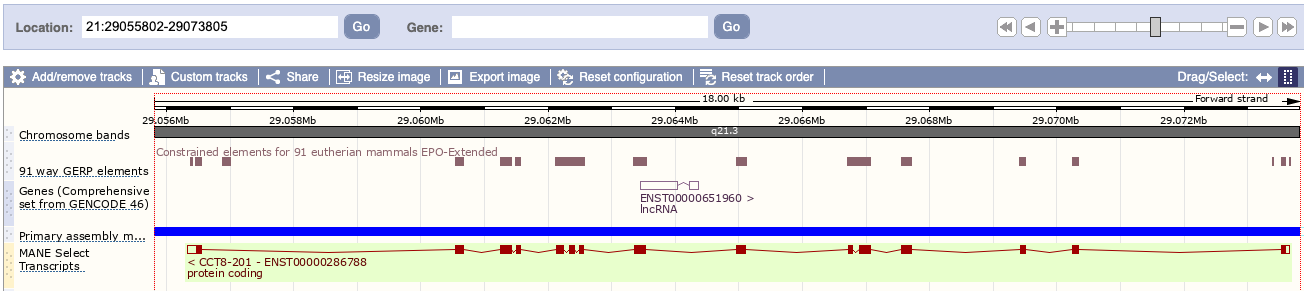

If you consider the [the Ensembl region in detail for CCT8](https://useast.ensembl.org/Homo_sapiens/Location/View?db=core;g=ENSG00000156261;r=21:29055802-29073805) (shown above), especially the MANE Select Transcripts track,  those reported as high confidence are many of the junctions expected in the series spanning the linear transcript. (I suggest looking under the `sort_junc` column almost all the way on the right in the table above.) Considering the [annotated splice junctions for CCT8 at the RJunBase database of human RNA splice junctions](http://www.rjunbase.org/rJunBase/search/searchResultBefore?keyword=CCT8)(ref. [Li. et al 2021](https://pubmed.ncbi.nlm.nih.gov/33179749/)) these match up exactly with the following linear splice junctions:

- http://www.rjunbase.org/rJunBase/search/detailInfoBefore?junctionId=CCT8_LS002&kind=ls  
- http://www.rjunbase.org/rJunBase/search/detailInfoBefore?junctionId=CCT8_LS003&kind=ls  
- http://www.rjunbase.org/rJunBase/search/detailInfoBefore?junctionId=CCT8_LS004&kind=ls  
- http://www.rjunbase.org/rJunBase/search/detailInfoBefore?junctionId=CCT8_LS005&kind=ls  
- http://www.rjunbase.org/rJunBase/search/detailInfoBefore?junctionId=CCT8_LS008&kind=ls  
- http://www.rjunbase.org/rJunBase/search/detailInfoBefore?junctionId=CCT8_LS014&kind=ls  
- http://www.rjunbase.org/rJunBase/search/detailInfoBefore?junctionId=CCT8_LS018&kind=ls  
- http://www.rjunbase.org/rJunBase/search/detailInfoBefore?junctionId=CCT8_LS020&kind=ls  
- http://www.rjunbase.org/rJunBase/search/detailInfoBefore?junctionId=CCT8_LS031&kind=ls  

The `numReads` column, second from the left side of the table above, indicates many of these are well represented in the data, and this probably factors in significantly to why deemed high-confidence. **Note all of them have both sides of the junction annotated**, indicated by the `True` for each in the `both_ann` column, that is to the left of the `sort_junc` column.

-------

Enjoy!